In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yuness","key":"a255cfbc1b7e14cbd160722f93254ae2"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
#! kaggle datasets list

In [8]:
! kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

100% 609M/612M [00:04<00:00, 134MB/s]
100% 612M/612M [00:04<00:00, 130MB/s]


In [9]:
!mkdir traffic-signs

In [ ]:
!unzip gtsrb-german-traffic-sign.zip -d traffic-signs

In [11]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,load_model
from keras.layers import Conv2D,Dropout,Flatten,Dense,MaxPool2D

In [12]:
os.chdir('/content/traffic-signs')

In [13]:
image_width=30
image_height=30
image_size=(image_width,image_height)
data=[]
labels=[]
classes=43
epochs=10
cur_path=os.getcwd()

In [14]:
for i in range(classes):
  path=os.path.join(cur_path,'train',str(i))
  images=os.listdir(path)
  for a in images:
    image = Image.open(path + '/'+ a)
    image = image.resize(image_size)
    image = np.array(image)
    data.append(image)
    labels.append(i)

In [15]:
print(type(data))
print(type(labels))

<class 'list'>
<class 'list'>


In [16]:
data=np.array(data)
labels=np.array(labels)

In [17]:
print(type(data))
print(type(labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [18]:
print(data.shape,labels.shape)

(39209, 30, 30, 3) (39209,)


In [19]:
X_train,X_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=0)

In [20]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [21]:
y_train=to_categorical(y_train,43)
y_test=to_categorical(y_test,43)

In [22]:
model=Sequential([
          Conv2D(filters=32, kernel_size=(5,5), activation='relu',input_shape=X_train.shape[1:]),
          Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
          MaxPool2D(pool_size=(2, 2)),
          Dropout(0.25),
          Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
          Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
          MaxPool2D(pool_size=(2, 2)),
          Dropout(0.25),
          Flatten(),
          Dense(256,activation='relu'),
          Dropout(0.5),
          Dense(classes,activation='softmax')
          ])

In [23]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
history=model.fit(X_train,y_train,batch_size=32,epochs=epochs,validation_data=(X_test,y_test))

Epoch 1/10
981/981 [==============================] - 133s 134ms/step - loss: 2.4298 - accuracy: 0.3781 - val_loss: 0.7671 - val_accuracy: 0.8138
Epoch 2/10
981/981 [==============================] - 131s 134ms/step - loss: 0.8725 - accuracy: 0.7404 - val_loss: 0.2717 - val_accuracy: 0.9246
Epoch 3/10
981/981 [==============================] - 130s 133ms/step - loss: 0.5159 - accuracy: 0.8478 - val_loss: 0.1789 - val_accuracy: 0.9524
Epoch 4/10
981/981 [==============================] - 127s 129ms/step - loss: 0.3931 - accuracy: 0.8864 - val_loss: 0.1099 - val_accuracy: 0.9704
Epoch 5/10
981/981 [==============================] - 129s 131ms/step - loss: 0.3318 - accuracy: 0.9051 - val_loss: 0.0941 - val_accuracy: 0.9764
Epoch 6/10
981/981 [==============================] - 123s 125ms/step - loss: 0.3078 - accuracy: 0.9125 - val_loss: 0.0673 - val_accuracy: 0.9821
Epoch 7/10
981/981 [==============================] - 126s 129ms/step - loss: 0.2868 - accuracy: 0.9186 - val_loss: 0.0719 -

In [25]:
model.save("traffic-signs.h5")

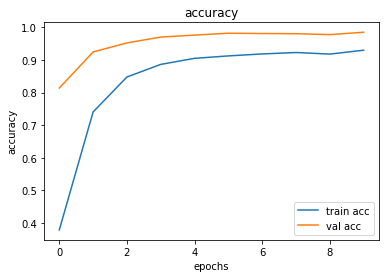

In [34]:
plt.plot(history.history['accuracy'],label='train acc')
plt.plot(history.history['val_accuracy'],label='val acc')
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

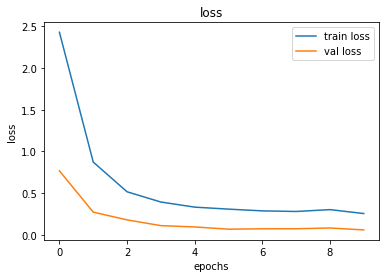

In [35]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.title('loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [50]:
def testing(testcsv):
  csvfolder = pd.read_csv('/content/traffic-signs/Test.csv')
  the_labels = csvfolder["ClassId"].values
  the_paths = csvfolder["Path"].values
  the_data=[]
  exact='/content/traffic-signs/'
  for the_image in the_paths:
    the_image = Image.open(exact+str(the_image))
    the_image = the_image.resize((30,30))
    the_data.append(np.array(the_image))
    the_images=np.array(the_data)
  return the_images,the_labels

In [48]:
csvfolder = pd.read_csv('/content/traffic-signs/Test.csv')
the_labels = csvfolder["ClassId"].values
the_paths = csvfolder["Path"].values
print(the_paths)

['Test/00000.png' 'Test/00001.png' 'Test/00002.png' ... 'Test/12627.png'
 'Test/12628.png' 'Test/12629.png']


In [51]:
X_test, label = testing('/content/traffic-signs/Test.csv')

In [57]:
Y_pred = np.argmax(model.predict(X_test),axis=-1)
Y_pred

array([16,  1, 38, ..., 32,  7, 10])

In [60]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.9534441805225653
